# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Muhammad Dzaky]
- **Email:** [m004b4ky2791@bangkit.academy]
- **ID Dicoding:** [muhammad_dzaky_6esm]

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh musim dengan jumlah penyewaan sepeda?
- Bagaimana pengaruh cuaca dengan jumlah penyewaan sepeda?
- Bagaimana pola penyewaan sepeda pada bulan-bulan tertentu dalam satu tahun?
- Bagaimana perbedaan pola penggunaan sepeda pada jam kerja (pagi dan sore hari) dibandingkan dengan jam lain?
- Bagaimana faktor lingkungan (Temperature, Humidity, dan Windspeed) mempengaruhi jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Data Wrangling

### Gathering Data

In [3]:
daydf = pd.read_csv("data\day.csv")
daydf.head()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\USER\AppData\Local\Temp\ipykernel_6924\713865583.py:1: SyntaxWarning: invalid escape sequence '\d'
  daydf = pd.read_csv("data\day.csv")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Menyusun dataframe dari data Bike Sharing Dataset, untuk sampling waktu per hari dan per jam (diperoleh 2 macam dataset).

In [4]:
hourdf= pd.read_csv("data\hour.csv")
hourdf.head()

<>:1: SyntaxWarning: invalid escape sequence '\h'
<>:1: SyntaxWarning: invalid escape sequence '\h'
C:\Users\USER\AppData\Local\Temp\ipykernel_6924\3205109956.py:1: SyntaxWarning: invalid escape sequence '\h'
  hourdf= pd.read_csv("data\hour.csv")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Dataset Information

In [5]:
daydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dari hasil dataframe information yang diperoleh tersebut, menunjukkan bahwa data tersebut memiliki 16 Feature dengan jumlah data non-null yang konsisten untuk tiap featurenya. Akan tetapi, pada feature dteday terjadi kesalahan tipe data karena tipe data object dimana seharusnya menjadi datetime64


In [6]:
hourdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


pada dataframe hour memiliki tambahan 1 feature yakni hr. Sama seperti data sebelumnya, dimana pada feature dteday terdapat kesalahan tipe data berupa object yang mana seharusnya adalah datetime64

#### Missing Value


In [7]:
daydf.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
hourdf.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Pada kedua dataframe tersebut terlihat bahwa tidak ada missing value baik pada daydf maupun hourdf


#### Duplicate Data


In [9]:
daydf.duplicated().sum()

0

In [10]:
hourdf.duplicated().sum()

0

Dari kedua dataframe tersebut menunjukkan tidak ada data duplikasi baik pada daydf maupun hourdf

### Cleaning Data

Hasil dari Data Assesment menunjukkan bahwa perbaikan yang harus dilakukan pada data adalah mengubah datatype feature "dteday" dari object menjadi datetime

In [11]:
daydf["dteday"] = pd.to_datetime(daydf["dteday"])
hourdf["dteday"] = pd.to_datetime(hourdf["dteday"])

In [12]:
daydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [13]:
hourdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Descriptive Statistics

In [14]:
daydf.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [15]:
hourdf.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Diperoleh rangkuman parameter statistik seperti mean, min, max, Q1, Q2 dan lain sebagainya


### Data Distribution


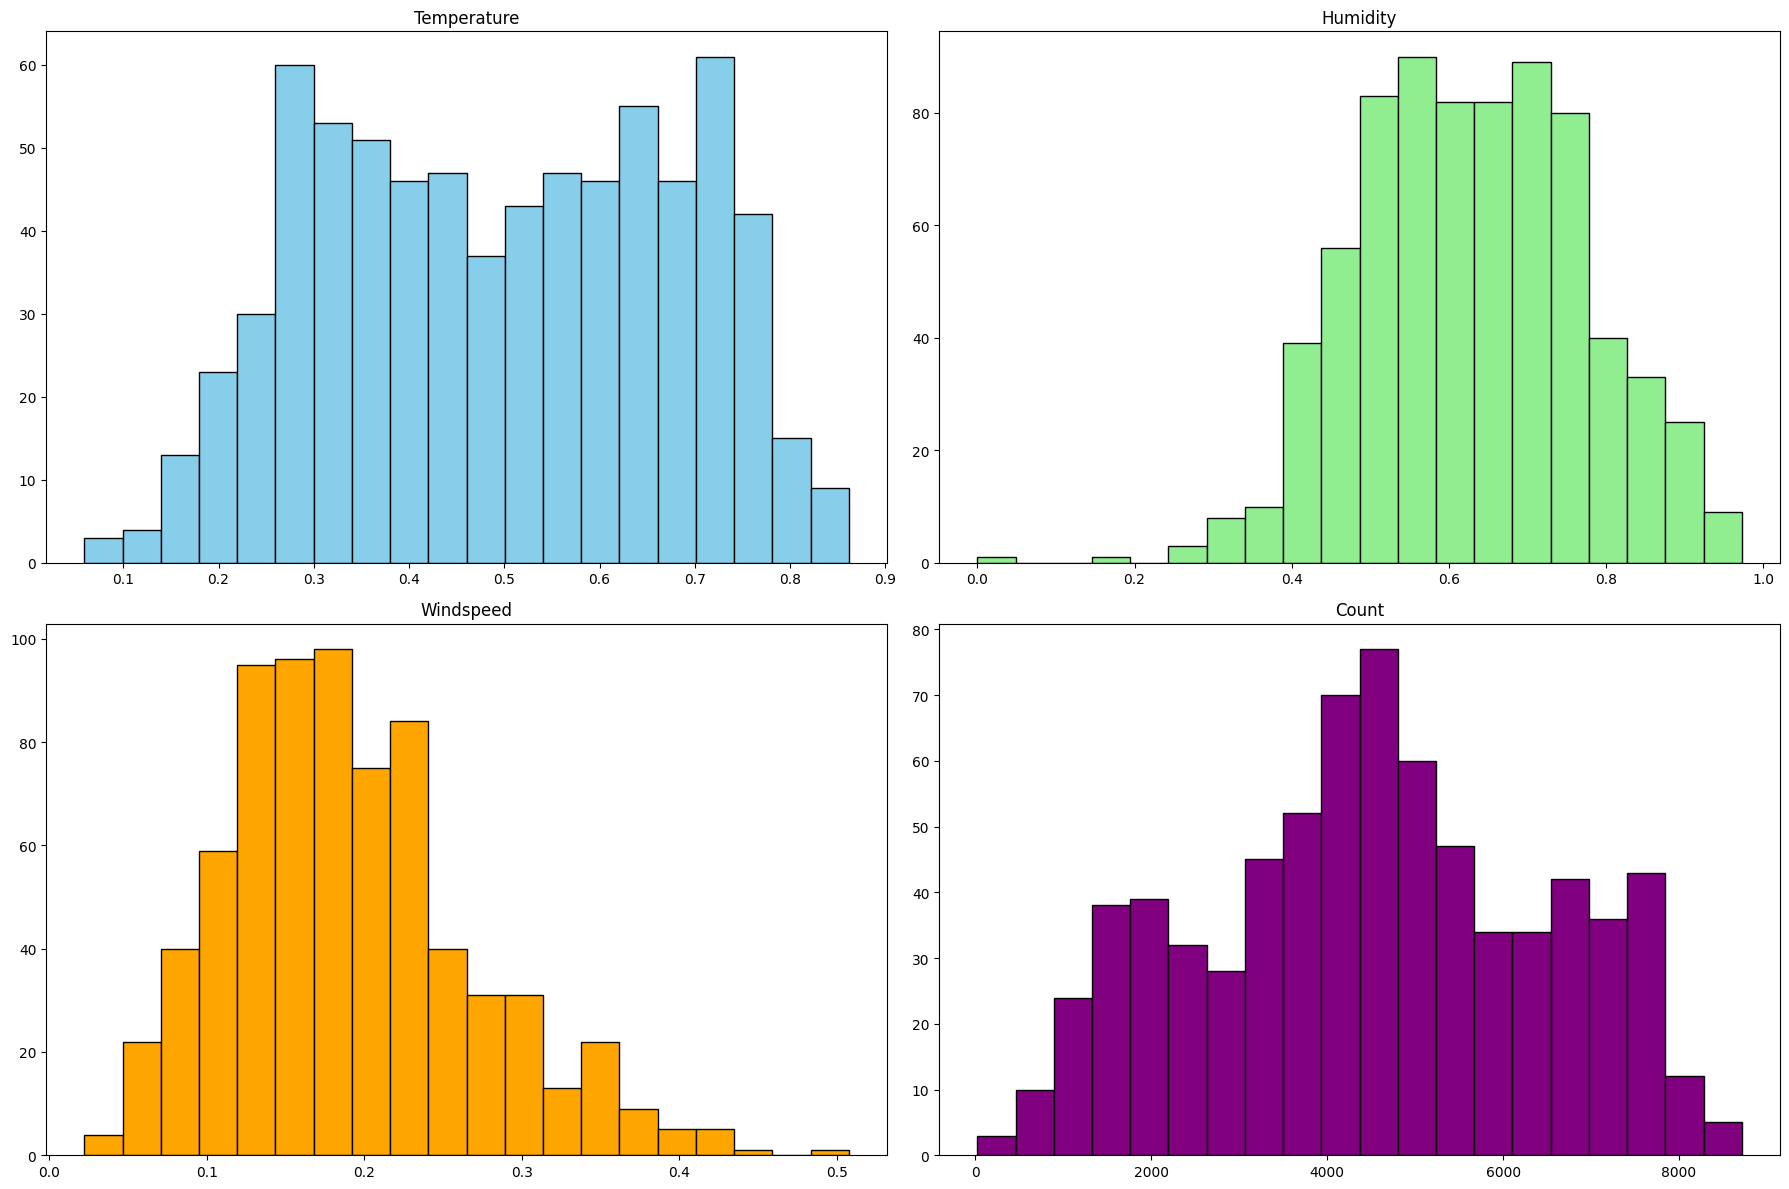

In [16]:
plt.figure(figsize=(18, 12))


plt.subplot(2, 2, 1)
plt.hist(daydf['temp'], bins=20, color='skyblue', edgecolor='black')
plt.title('Temperature')

plt.subplot(2, 2, 2)
plt.hist(daydf['hum'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Humidity')


plt.subplot(2, 2, 3)
plt.hist(daydf['windspeed'], bins=20, color='orange', edgecolor='black')
plt.title('Windspeed')

plt.subplot(2, 2, 4)
plt.hist(daydf['cnt'], bins=20, color='purple', edgecolor='black')
plt.title('Count')

plt.tight_layout()
plt.show()

**Insight**
- Data Temperature dan Count terdistribusi normal
- Data Windspeed terdistribusi right-skewed
- Data Humidity terdistribusi left-skewed

### Grouping & Aggregation

In [17]:

# Mengelompokkan data untuk setiap kombinasi variabel dan menghitung jumlah total rental bike (cnt)
season_df = daydf.groupby('season')['cnt'].sum().reset_index()
weathersit_df = daydf.groupby('weathersit')['cnt'].sum().reset_index()
year_df = daydf.groupby('yr')['cnt'].sum().reset_index()
workingday_df = daydf.groupby('workingday')['cnt'].sum().reset_index()

# Mengganti kode menjadi label untuk interpretasi yang lebih mudah
season_labels = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
weathersit_labels = {1: 'Clear, Few clouds, Partly cloudy, Partly cloudy', 2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds', 3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds', 4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'}
year_labels = {0: '2011', 1: '2012'}
workingday_labels = {0: 'Non-working Day', 1: 'Working Day'}

# Mengganti nilai kolom dengan label yang lebih mudah dimengerti
season_df['season'] = season_df['season'].map(season_labels)
weathersit_df['weathersit'] = weathersit_df['weathersit'].map(weathersit_labels)
year_df['yr'] = year_df['yr'].map(year_labels)
workingday_df['workingday'] = workingday_df['workingday'].map(workingday_labels)

# Menampilkan tabel hasil
print("Jumlah Total Rental Bike Berdasarkan Season:")
print(season_df)

print("\nJumlah Total Rental Bike Berdasarkan Weathersit:")
print(weathersit_df)

print("\nJumlah Total Rental Bike Berdasarkan Year:")
print(year_df)

print("\nJumlah Total Rental Bike Berdasarkan Workingday:")
print(workingday_df)


Jumlah Total Rental Bike Berdasarkan Season:
   season      cnt
0  Spring   471348
1  Summer   918589
2    Fall  1061129
3  Winter   841613

Jumlah Total Rental Bike Berdasarkan Weathersit:
                                          weathersit      cnt
0    Clear, Few clouds, Partly cloudy, Partly cloudy  2257952
1  Mist + Cloudy, Mist + Broken clouds, Mist + Fe...   996858
2  Light Snow, Light Rain + Thunderstorm + Scatte...    37869

Jumlah Total Rental Bike Berdasarkan Year:
     yr      cnt
0  2011  1243103
1  2012  2049576

Jumlah Total Rental Bike Berdasarkan Workingday:
        workingday      cnt
0  Non-working Day  1000269
1      Working Day  2292410


**Insight**
- season dengan jumlah rental bike terbanyak adalah pada season **Fall**
- weather dengan jumlah rental bike terbanyak adalah pada weather **Clear**
- Tahun dengan jumlah rental terbanyak adalah **2012**
- Jumlah rental bike terbanyak pada workingday

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh musim dengan jumlah penyewaan sepeda?

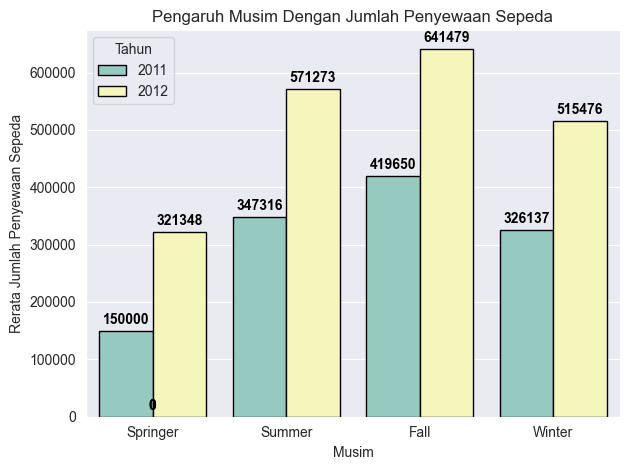

In [18]:
season_counts = daydf.groupby(by=["season", "yr"]).agg({"cnt": "sum"}).reset_index()

season_labels = {1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
year_labels = {0: '2011', 1: '2012'}
season_counts['season'] = season_counts['season'].map(season_labels)
season_counts['yr'] = season_counts['yr'].map(year_labels)

sns.set_style('darkgrid')
bar_plot = sns.barplot(data=season_counts, x="season", y="cnt", hue="yr", palette="Set3", edgecolor="black")

for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 8),
                      textcoords='offset points', fontsize=10, fontweight='bold', color='black')
plt.ylabel("Rerata Jumlah Penyewaan Sepeda")
plt.xlabel("Musim")
plt.title("Pengaruh Musim Dengan Jumlah Penyewaan Sepeda")
plt.legend(title="Tahun", loc="upper left")
plt.tight_layout()
plt.show()

### Pertanyaan 2: Bagaimana pengaruh cuaca dengan jumlah penyewaan sepeda?

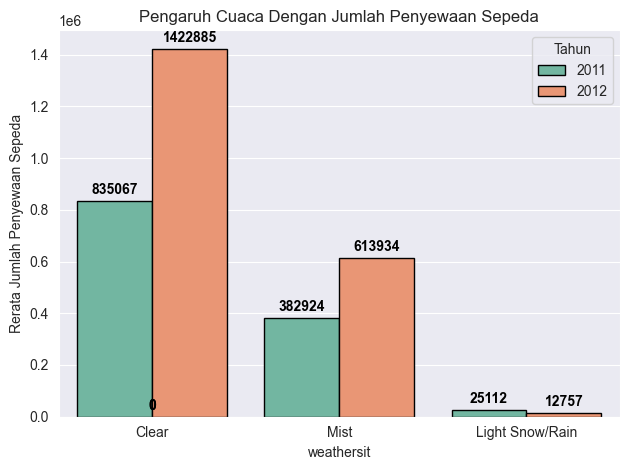

In [19]:
weathersit_counts = daydf.groupby(by=["weathersit", "yr"]).agg({"cnt": "sum"}).reset_index()

season_labels = {1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy Rain'}
year_labels = {0: '2011', 1: '2012'}
weathersit_counts['weathersit'] = weathersit_counts['weathersit'].map(season_labels)
weathersit_counts['yr'] = weathersit_counts['yr'].map(year_labels)

sns.set_style('darkgrid')
bar_plot = sns.barplot(data=weathersit_counts, x="weathersit", y="cnt", hue="yr", palette="Set2", edgecolor="black")

for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 8),
                      textcoords='offset points', fontsize=10, fontweight='bold', color='black')

plt.ylabel("Rerata Jumlah Penyewaan Sepeda")
plt.title("Pengaruh Cuaca Dengan Jumlah Penyewaan Sepeda")
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

### Pertanyaan 3: Bagaimana pola penyewaan sepeda pada bulan-bulan tertentu dalam satu tahun?


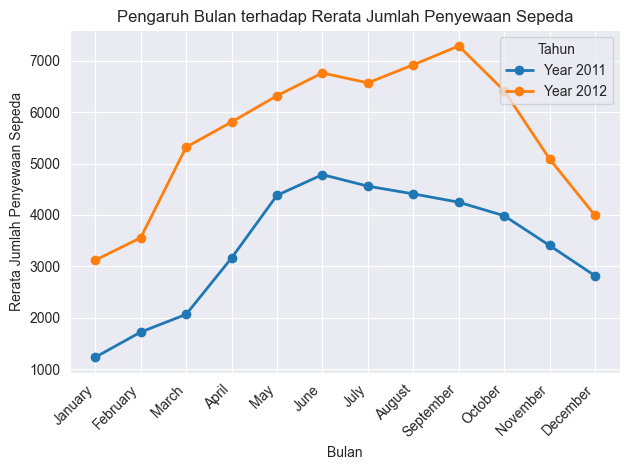

In [20]:
monthly_rental_counts = daydf.groupby(by=["mnth", "yr"]).agg({"cnt": "mean"}).reset_index()

month_labels = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
                7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
year_labels = {0: '2011', 1: '2012'}
monthly_rental_counts['mnth'] = monthly_rental_counts['mnth'].map(month_labels)
monthly_rental_counts['yr'] = monthly_rental_counts['yr'].map(year_labels)

sns.set_style('darkgrid')
for year in monthly_rental_counts['yr'].unique():
    year_data = monthly_rental_counts[monthly_rental_counts['yr'] == year]
    plt.plot(year_data['mnth'], year_data['cnt'], marker='o', label=f'Year {year}', linestyle='-', linewidth=2)
plt.ylabel("Rerata Jumlah Penyewaan Sepeda")
plt.xlabel("Bulan")
plt.title("Pengaruh Bulan terhadap Rerata Jumlah Penyewaan Sepeda")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Tahun", loc="upper right")

plt.tight_layout()
plt.show()

### Pertanyaan 4: Bagaimana perbedaan pola penggunaan sepeda pada jam kerja (7-18) dibandingkan dengan jam lain?


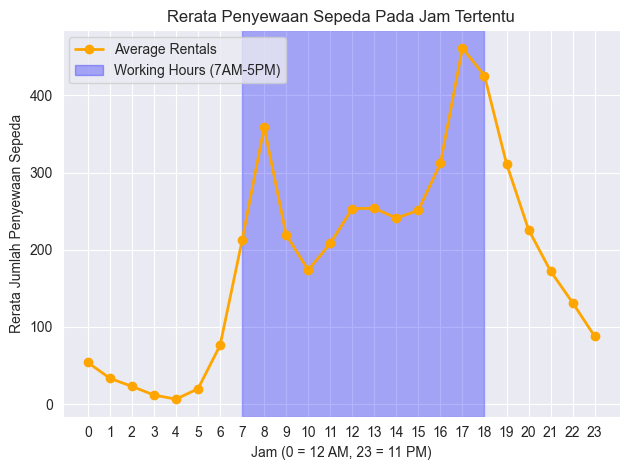

In [21]:
hourly_rental_counts = hourdf.groupby(by=["hr"]).agg({"cnt": "mean"}).reset_index()
plt.plot(hourly_rental_counts['hr'], hourly_rental_counts['cnt'], marker='o', linestyle='-',color='orange', linewidth=2, label='Average Rentals')


plt.axvspan(7, 18, color='blue', alpha=0.3, label='Working Hours (7AM-5PM)')
plt.ylabel("Rerata Jumlah Penyewaan Sepeda")
plt.xlabel("Jam (0 = 12 AM, 23 = 11 PM)")
plt.title("Rerata Penyewaan Sepeda Pada Jam Tertentu")
plt.xticks(range(0, 24))
plt.legend()

plt.tight_layout()
plt.show()


### Pertanyaan 5: Bagaimana faktor lingkungan (Temperature, Humidity, dan Windspeed) mempengaruhi jumlah penyewaan sepeda?

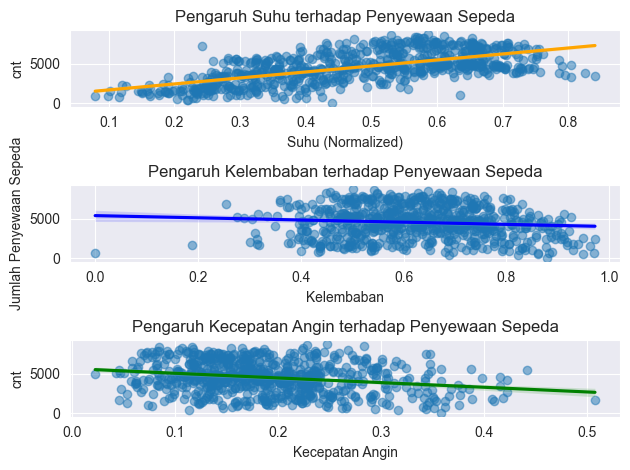

In [22]:
# Plot 1: Pengaruh suhu (atemp) terhadap rerata penyewaan sepeda
plt.subplot(3, 1, 1)
sns.regplot(x='atemp', y='cnt', data=daydf, scatter_kws={'alpha':0.5}, line_kws={"color": "orange"})
plt.title('Pengaruh Suhu terhadap Penyewaan Sepeda')
plt.xlabel('Suhu (Normalized)')


# Plot 2: Pengaruh kelembaban (hum) terhadap rerata penyewaan sepeda
plt.subplot(3, 1, 2)
sns.regplot(x='hum', y='cnt', data=daydf, scatter_kws={'alpha':0.5}, line_kws={"color": "blue"})
plt.title('Pengaruh Kelembaban terhadap Penyewaan Sepeda')
plt.xlabel('Kelembaban')
plt.ylabel('Jumlah Penyewaan Sepeda')

# Plot 3: Pengaruh kecepatan angin (windspeed) terhadap rerata penyewaan sepeda
plt.subplot(3, 1, 3)
sns.regplot(x='windspeed', y='cnt', data=daydf, scatter_kws={'alpha':0.5}, line_kws={"color": "green"})
plt.title('Pengaruh Kecepatan Angin terhadap Penyewaan Sepeda')
plt.xlabel('Kecepatan Angin')

plt.tight_layout()
plt.show()

## Conclusion

- Conclusion Question 1
Hasil visualisasi yang diperoleh menunjukkan pengaruh musim bahwa untuk periode tahun 2011 dan 2012, jumlah penyewaan sepeda terbesar diperoleh pada musim gugur *(Fall)* dan jumlah penyewaan sepeda terkecil diperoleh pada musim semi *(springer)*.
- Conclusion Question 2
Hasil visualisasi yang diperoleh menunjukkan pengaruh cuaca bahwa untuk periode tahun 2011 dan 2012, jumlah penyewaan sepeda terbesar diperoleh pada cuaca kategori 1: Clear, Few clouds, Partly cloudy, Partly cloudy dan jumlah penyewaan sepeda terkecil diperoleh pada cuaca kategori 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- Hasil visualisasi jumlah penyewaan sepeda untuk tiap bulan menunjukkan bahwa untuk tiap tahun (2011 & 2012) memiliki tren yang hampir serupa dimana nilai minimum berada pada awal tahun dan nilai maksimumnya berada pada pertengahan tahun
- Hasil visualisasi yang diperoleh menunjukkan bahwa pada working hours (7 - 18) merupakan peak hours karena merupakan jam pergi dan pulang kerja
- Suhu adalah faktor yang paling berdampak positif terhadap peningkatan jumlah penyewaan sepeda. Semakin hangat cuaca, semakin banyak orang yang tertarik untuk bersepeda. Kelembaban memiliki dampak negatif kecil terhadap penyewaan sepeda, tetapi efeknya tidak sesignifikan suhu. Kecepatan angin secara signifikan mempengaruhi penyewaan sepeda secara negatif. Kondisi berangin cenderung mengurangi kenyamanan atau keamanan bersepeda.

